In [1]:
import numpy as np
import pandas as pd
from glob import glob
from os.path import join, dirname

In [2]:
root_dir = './'
behav_dir = root_dir + '/DMdata'

In [3]:
subj_dir = glob(join(behav_dir,'DM*'))
subj_dir.sort()
len(subj_dir)

31

# Task Type : 
### old = 0, new = 1
# Response 1 : 
### Old_Certain = 1, Old_Uncertain = 2, New_Uncertain = 3, New_Certain = 4
# Response 2 : 
### Location, new = 0, forgot = 5

In [4]:
ds = pd.DataFrame(columns=['Trial','ObjID','LocID','FB','Task','RT','Stim'])
for sd in subj_dir:
    subj = sd[-4:]
    temp = pd.read_csv(sd+'/%s_study.txt'%subj, sep='\t', index_col=False)
    temp['Subj'] = subj
    ds = ds.append(temp)
# ds = ds.set_index(keys='Subj')
ds = ds[['ObjID','LocID','Subj']]
ds

,ObjID,LocID,Subj
0,245,4,DM01
1,183,2,DM01
2,54,1,DM01
3,220,3,DM01
4,65,2,DM01
...,...,...,...
259,179,1,DM31
260,153,4,DM31
261,54,2,DM31
262,53,3,DM31


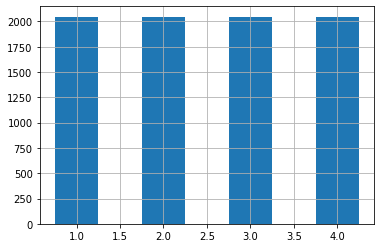

In [5]:
ini, fin = 1, 4
ds['LocID'].hist(bins=np.arange(ini-.25,fin+.75,.5))

In [6]:
dt = pd.DataFrame(columns=['Trial','Object_ID','Task_Type','Stim_onset1','RT1','Res1','Stim_onset2','RT2','Res2'])
for sd in subj_dir:
    subj = sd[-4:]
    temp = pd.read_csv(sd+'/%s_test.txt'%subj, sep='\s+', header=0)
    temp['Subj'] = subj
    dt = dt.append(temp)
# dt = dt.set_index(keys='Subj')
dt = dt[['Trial','Object_ID','Task_Type','Res1','Res2','Subj']]
dt = dt.rename(columns={'Object_ID':'ObjID','Task_Type':'TT'})
dt

,Trial,ObjID,TT,Res1,Res2,Subj
0,1,72,1,2,0,DM01
1,2,122,1,4,0,DM01
2,3,114,1,3,0,DM01
3,4,108,0,1,3,DM01
4,5,145,0,1,3,DM01
...,...,...,...,...,...,...
523,524,54,0,4,5,DM31
524,525,253,0,1,2,DM31
525,526,108,1,4,0,DM31
526,527,38,0,1,4,DM31


In [7]:
dt = dt[~dt['TT'].isin([1])]
df = pd.merge(ds,dt)
df

,ObjID,LocID,Subj,Trial,TT,Res1,Res2
0,245,4,DM01,116,0,1,4
1,183,2,DM01,61,0,3,5
2,54,1,DM01,95,0,1,1
3,220,3,DM01,515,0,3,3
4,65,2,DM01,73,0,1,2
...,...,...,...,...,...,...,...
8178,179,1,DM31,112,0,4,5
8179,153,4,DM31,59,0,2,5
8180,54,2,DM31,524,0,4,5
8181,53,3,DM31,419,0,4,5


In [8]:
choice = ['HIT-HC','HIT-LC','MISS-LC','MISS-HC']
df['Res1'] = df['Res1'].replace({1:choice[0],2:choice[1],3:choice[2],4:choice[3]})
df

,ObjID,LocID,Subj,Trial,TT,Res1,Res2
0,245,4,DM01,116,0,HIT-HC,4
1,183,2,DM01,61,0,MISS-LC,5
2,54,1,DM01,95,0,HIT-HC,1
3,220,3,DM01,515,0,MISS-LC,3
4,65,2,DM01,73,0,HIT-HC,2
...,...,...,...,...,...,...,...
8178,179,1,DM31,112,0,MISS-HC,5
8179,153,4,DM31,59,0,HIT-LC,5
8180,54,2,DM31,524,0,MISS-HC,5
8181,53,3,DM31,419,0,MISS-HC,5


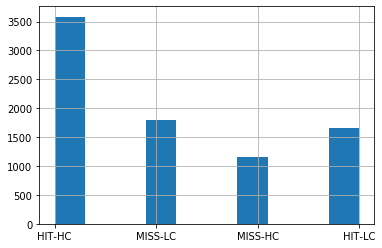

In [9]:
df['Res1'].hist()